# Sample Analysis

4 different seeds with the following:

* Seed A: 0
* Seed B: 42
* Seed C: 123
* Seed D: 2025

These seeds were originally used but rerun used `random_numbers = [random.randint(1, 100000) for _ in range(4)]
`
Seeds were [838111, 14593, 3279, 97197]

652 samples with the following:

* TP: 163
* TN: 163
* FP: 163
* FN: 163

### Samples df

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import spearmanr, kendalltau
from sklearn.metrics import jaccard_score


from master_thesis.config import PROCESSED_DATA_DIR, load_dataframe_from_pickle, save_dataframe_as_pickle

2025-05-19 23:53:48.918 | INFO     | master_thesis.config:<module>:12 - PROJ_ROOT path is: /home/takosaga/Projects/master_thesis


In [2]:
working_df = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "experiment_rerun.pkl"
)

working_df.head(5)

,text,error,cardiff_label,cardiff_score,lime_cardiff,shap_cardiff,seed
0,"India is one nasty, dirty, filthy, germsy, law...",NaN,HATE,0.994301,"country: -0.13081460789510924, India: -0.11535...",": -1.309963408857584e-07, India : -0.137895100...",3279
1,solo que seras bombardeas y destruidos como lo...,NaN,HATE,0.957913,"virus: -0.6396167235678197, a: 0.2742073874468...",": 3.37468518409878e-05, s: -0.0331062855402706...",3279
2,@user @user You cannot argue with a retard jer...,NaN,HATE,0.994864,"retard: -0.6605584465804439, beggar: -0.131083...",": 1.7441052477806807e-06, @: 0.014520991622703...",3279
3,Can I just pound that pussy an pull your hair....,NaN,HATE,0.977588,"your: -0.5835825358540915, hair: -0.1533505593...",": 9.252107702195644e-08, Can : 0.0115244268963...",3279
4,you do not live in america nazi faggot but you...,NaN,HATE,0.985650,"faggot: -0.8942567996759809, nazi: -0.06532018...",": 1.1423340765759349e-05, you : 0.001079929454...",3279


df_shaps_only = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "samples_SHAP_seed_correction.pkl"
)

df_shaps_only.head()

working_df['shap_cardiff_seed_double_check'] = df_shaps_only['shap_cardiff']

d = dtale.show(df_shaps_only)
d.open_browser()

In [3]:
working_df['error'].value_counts()

Series([], Name: count, dtype: int64)

In [4]:
working_df['cardiff_hatespeech'] = working_df['cardiff_label'].apply(lambda x: 1 if x == 'HATE' else 0)

In [5]:
working_df.drop(columns=['cardiff_label'], inplace=True)

### Full df

In [6]:
full_hatespeech_df = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "annotated_and_targeted_hatespeech.pkl"
)

full_hatespeech_df.head(5)

,id_new,text,extracted_target,label_hatespeech_binary_offensive_not_included,label_hatespeech_binary_offensive_included,label_normal_offensive_hatespeech,platform,original_dataset_title,original_id,original_label,original_target
0,1,i dont think im getting my baby them white 9 h...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179055004553900032,normal,[None]
1,2,we cannot continue calling ourselves feminists...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179063826874032128,normal,[None]
2,3,nawt yall niggers ignoring me,{race},not_hatespeech,normal,normal,twitter,HateXplain,1178793830532956161,normal,[African]
3,4,<user> i am bit confused coz chinese ppl can n...,{race},hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179088797964763136,hatespeech,[Asian]
4,5,this bitch in whataburger eating a burger with...,"{gender, race}",hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179085312976445440,hatespeech,"[Caucasian, Women]"


In [7]:
columns_to_keep = ['id_new', 'text', 'extracted_target','label_hatespeech_binary_offensive_included','platform']
adjusted_hatespeech_df = full_hatespeech_df[columns_to_keep]

In [8]:
adjusted_hatespeech_df['is_hatespeech'] = adjusted_hatespeech_df['label_hatespeech_binary_offensive_included'].apply(lambda x: 1 if x == 'hatespeech/offensive' else 0)
adjusted_hatespeech_df['id'] = adjusted_hatespeech_df['id_new']

/tmp/ipykernel_75798/2421778535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_75798/2421778535.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
adjusted_hatespeech_df.drop(columns=['label_hatespeech_binary_offensive_included','id_new'], inplace=True)

/tmp/ipykernel_75798/3016290075.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
full_df = pd.merge(working_df, adjusted_hatespeech_df, on='text', how='inner')

In [11]:


d = dtale.show(full_df)
d.open_browser()

In [12]:
full_df = full_df.drop('error', axis=1)

In [13]:
full_df.columns

Index(['text', 'cardiff_score', 'lime_cardiff', 'shap_cardiff', 'seed',
       'cardiff_hatespeech', 'extracted_target', 'platform', 'is_hatespeech',
       'id'],
      dtype='object')

In [14]:
def evaluate_prediction(row):
    if row['is_hatespeech'] == 1 and row['cardiff_hatespeech'] == 1:
        return 'TP'
    elif row['is_hatespeech'] == 0 and row['cardiff_hatespeech'] == 0:
        return 'TN'
    elif row['is_hatespeech'] == 0 and row['cardiff_hatespeech'] == 1:
        return 'FP'
    elif row['is_hatespeech'] == 1 and row['cardiff_hatespeech'] == 0:
        return 'FN'

full_df['evaluation'] = full_df.apply(evaluate_prediction, axis=1)


In [15]:
full_df.head()

,text,cardiff_score,lime_cardiff,shap_cardiff,seed,cardiff_hatespeech,extracted_target,platform,is_hatespeech,id,evaluation
0,"India is one nasty, dirty, filthy, germsy, law...",0.994301,"country: -0.13081460789510924, India: -0.11535...",": -1.309963408857584e-07, India : -0.137895100...",3279,1,{nationality},youtube,1,53513,TP
1,solo que seras bombardeas y destruidos como lo...,0.957913,"virus: -0.6396167235678197, a: 0.2742073874468...",": 3.37468518409878e-05, s: -0.0331062855402706...",3279,1,{religion},gab,1,8335,TP
2,@user @user You cannot argue with a retard jer...,0.994864,"retard: -0.6605584465804439, beggar: -0.131083...",": 1.7441052477806807e-06, @: 0.014520991622703...",3279,1,"{disability, nationality}",twitter,1,64112,TP
3,Can I just pound that pussy an pull your hair....,0.977588,"your: -0.5835825358540915, hair: -0.1533505593...",": 9.252107702195644e-08, Can : 0.0115244268963...",3279,1,{gender},reddit,1,22034,TP
4,you do not live in america nazi faggot but you...,0.985650,"faggot: -0.8942567996759809, nazi: -0.06532018...",": 1.1423340765759349e-05, you : 0.001079929454...",3279,1,{sexuality},gab,1,18143,TP


In [16]:
# Full results dataframe saved
save_dataframe_as_pickle(full_df, PROCESSED_DATA_DIR.as_posix() + '/full_results.pkl')
full_df.to_csv(PROCESSED_DATA_DIR.as_posix() + '/full_results.csv', index=False)

DataFrame saved to /home/takosaga/Projects/master_thesis/data/processed/full_results.pkl


In [17]:
full_df[['lime_cardiff','shap_cardiff']]

,lime_cardiff,shap_cardiff
0,"country: -0.13081460789510924, India: -0.11535...",": -1.309963408857584e-07, India : -0.137895100..."
1,"virus: -0.6396167235678197, a: 0.2742073874468...",": 3.37468518409878e-05, s: -0.0331062855402706..."
2,"retard: -0.6605584465804439, beggar: -0.131083...",": 1.7441052477806807e-06, @: 0.014520991622703..."
3,"your: -0.5835825358540915, hair: -0.1533505593...",": 9.252107702195644e-08, Can : 0.0115244268963..."
4,"faggot: -0.8942567996759809, nazi: -0.06532018...",": 1.1423340765759349e-05, you : 0.001079929454..."
...,...,...
2603,"kike: -0.14370667110505084, jesus: 0.132638644...",": 4.0978193283081055e-08, um : 0.0233726911246..."
2604,"pathetic: -0.23700872838377945, a: 0.215914702...",": 4.0357311566670734e-07, Mom: 0.0108912767221..."
2605,"nigger: -0.52147452135587, say: 0.421584531242...",": -2.2202730178833008e-06, Black : 0.008567720..."
2606,"retard: -0.6576435617962614, I: 0.314014873883...",": -1.862645149230957e-08, pretty : 0.104445570..."


In [17]:


d = dtale.show(full_df[['lime_cardiff','shap_cardiff']])
d.open_browser()

In [18]:
type(full_df['lime_cardiff'][0])

str

### Ranking

In [18]:
import pandas as pd

def parse_and_rank_features(feature_string):
    """
    Parses a string of feature contributions, ranks them by absolute weight,
    and returns the top 5.

    Args:
        feature_string (str): A string in the format like "feat1: val1, feat2: val2, ..."
                              or ": val1, feat2: val2, ..." or "val1, feat2: val2, ...".
                              It can also be None, NaN, or an empty string.

    Returns:
        list: A list of up to 5 tuples, where each tuple is (feature_name, original_weight).
              The list is sorted by the absolute value of the weights in descending order.
              Returns an empty list if the input is invalid or no features are parsed.
    """
    if not isinstance(feature_string, str) or not feature_string.strip():
        # Handles None, NaN, empty string, or string with only whitespace
        return []

    # Split the main string by commas to get individual feature parts
    raw_items = feature_string.split(',')
    
    feature_contributions = []
    for raw_item in raw_items:
        item = raw_item.strip()  # Remove leading/trailing whitespace from the part
        if not item:
            continue  # Skip if the part is empty after stripping

        # We use rpartition(':') to split the item by the *last* colon.
        # This is robust in case a feature name itself contains a colon.
        # - If "name:value", parts are ('name', ':', 'value')
        # - If ":value", parts are ('', ':', 'value')
        # - If "value" (no colon), parts are ('value', '', '')
        name_part, separator, value_part = item.rpartition(':')
        
        feature_name = ""
        weight_str = ""

        if separator == ':':
            # This is the common case, e.g., "feature_name: 0.5" or ": 0.5"
            feature_name = name_part.strip()
            weight_str = value_part.strip()
        else:
            # No colon was found in this item. Assume the entire item is a weight
            # for an unnamed feature. e.g. "0.5" becomes feature="", weight="0.5"
            feature_name = ""  # Default to an empty string for the feature name
            weight_str = name_part.strip() # The whole item (name_part here) is the weight string

        if not weight_str:
            # This occurs if the item was like "feature_name:" (empty after colon)
            # or if after parsing, weight_str ended up empty.
            # print(f"Warning: No weight value found for item '{item}'. Skipping.") # Optional: for debugging
            continue
            
        try:
            weight = float(weight_str)
            feature_contributions.append({
                'feature': feature_name, 
                'weight': weight, 
                'abs_weight': abs(weight)
            })
        except ValueError:
            # This occurs if the weight_str cannot be converted to a float.
            # print(f"Warning: Could not parse weight from '{weight_str}' in item '{item}'. Skipping.") # Optional: for debugging
            continue
            
    # Sort the collected features by their absolute weight in descending order
    sorted_features = sorted(feature_contributions, key=lambda x: x['abs_weight'], reverse=True)
    
    # Get the top 5 (or fewer if not enough features were parsed)
    top_5 = [(f['feature'], f['weight']) for f in sorted_features[:5]]
    
    return top_5

In [19]:
# Apply the function to the 'lime_cardiff' column
full_df['lime_top5'] = full_df['lime_cardiff'].apply(parse_and_rank_features)

# Apply the function to the 'shap_cardiff' column
full_df['shap_top5'] = full_df['shap_cardiff'].apply(parse_and_rank_features)

# Sanity check with shap_cardiff_seed_double_check
# full_df['shap_top5'] = full_df['shap_cardiff_seed_double_check'].apply(parse_and_rank_features)

In [96]:

d = dtale.show(full_df[['lime_top5','shap_top5']])
d.open_browser()

In [97]:
d = dtale.show(full_df)
d.open_browser()

In [23]:
d.kill()

2025-05-16 16:29:45,021 - INFO     - Executing shutdown...
2025-05-16 16:29:45,022 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [24]:
type(full_df['lime_top5'][0][0][0])

str

In [20]:
def extract_feature_names(top_features_list):
    """
    Extracts only the feature names from a list of (feature_name, weight) tuples.
    The order of feature names is preserved.

    Args:
        top_features_list (list): A list of tuples, where each tuple is expected
                                  to be (feature_name, weight). This is typically
                                  the output from the parse_and_rank_features function.

    Returns:
        list: A list of strings (feature names). Returns an empty list if the
              input is not a list or is empty.
    """
    if not isinstance(top_features_list, list):
        # Handles cases where the input might not be a list (e.g., if an error occurred upstream)
        return []
    
    # Extracts the first element (feature name) from each tuple in the list
    # Ensures that it only processes actual tuples with at least one element
    feature_names = [
        feature_tuple[0] 
        for feature_tuple in top_features_list 
        if isinstance(feature_tuple, tuple) and len(feature_tuple) > 0
    ]
    return feature_names

In [21]:
# Apply the new function to the 'lime_top5' column
full_df['lime_top5_names'] = full_df['lime_top5'].apply(extract_feature_names)

# Apply the new function to the 'shap_top5' column
full_df['shap_top5_names'] = full_df['shap_top5'].apply(extract_feature_names)

In [22]:
d = dtale.show(full_df[['id','lime_top5_names','shap_top5_names','seed']])
d.open_browser()

In [33]:
d.kill()

2025-05-16 16:31:26,701 - INFO     - Executing shutdown...
2025-05-16 16:31:26,702 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


### Applying Metrics

In [23]:
def calculate_jaccard_similarity(list1, list2):
    """
    Calculates the Jaccard similarity between two lists of feature names.
    """
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union == 0:
        return 1.0 # Or 0.0, depending on how you want to treat two empty lists
    return intersection / union

In [24]:

def calculate_rank_correlation(list1, list2, method='spearman'):
    """
    Calculates Spearman's rank correlation or Kendall's Tau for two lists of feature names.
    Features are ranked by their position in the list.
    Features not present in one list but present in the other are handled by
    assigning them a rank lower than any item in the list.
    
    Args:
        list1 (list): First list of feature names (ordered).
        list2 (list): Second list of feature names (ordered).
        method (str): 'spearman' or 'kendall'.

    Returns:
        float: The correlation coefficient. Returns NaN if lists are too short or have no overlap.
    """
    all_features = list(set(list1) | set(list2))
    if not all_features:
        return 1.0 # Or NaN, if both lists are empty

    # Create ranks for each list.
    # Features present get their 0-indexed position as rank.
    # Features not present get a rank equal to the length of the list (lower importance).
    ranks1 = {feature: i for i, feature in enumerate(list1)}
    ranks2 = {feature: i for i, feature in enumerate(list2)}

    vec1 = [ranks1.get(f, len(list1)) for f in all_features]
    vec2 = [ranks2.get(f, len(list2)) for f in all_features]

    if len(vec1) < 2 or len(vec2) < 2 : # Correlation is not well-defined for single elements
        return None # Or handle as per your needs, e.g. 0 or 1 if lists are identical but short

    # Handle cases where all ranks are the same (no variance), scipy might return NaN or error
    if len(set(vec1)) <= 1 or len(set(vec2)) <= 1:
         if vec1 == vec2: # If they are identical constant lists
             return 1.0
         else: # Different constant lists or one constant, one not
             return 0.0 # Or None, as correlation is tricky here

    if method == 'spearman':
        corr, _ = spearmanr(vec1, vec2)
    elif method == 'kendall':
        corr, _ = kendalltau(vec1, vec2)
    else:
        raise ValueError("Method must be 'spearman' or 'kendall'")
    
    return corr

In [25]:
results = [] # To store the comparison results

# Group by 'id'
grouped_by_id = full_df.groupby('id')

for id_val, group in grouped_by_id:
    if len(group) < 2: # Need at least two different seeds for comparison
        continue

    # Convert rows to a list of tuples (seed, feature_list) for easier iteration
    # Focusing on LIME for this example:
    seed_feature_lists_lime = []
    for _, row in group.iterrows():
        seed_feature_lists_lime.append((row['seed'], row['lime_top5_names']))
    
    seed_feature_lists_shap = []
    for _, row in group.iterrows():
        seed_feature_lists_shap.append((row['seed'], row['shap_top5_names']))


    # Pairwise comparison for LIME lists within the current 'id' group
    for i in range(len(seed_feature_lists_lime)):
        for j in range(i + 1, len(seed_feature_lists_lime)):
            seed1, list1 = seed_feature_lists_lime[i]
            seed2, list2 = seed_feature_lists_lime[j]

            # Ensure lists are actually lists (they should be from .apply(extract_feature_names))
            if not isinstance(list1, list) or not isinstance(list2, list):
                print(f"Warning: Skipping comparison for id {id_val}, seeds {seed1}-{seed2} due to non-list feature set.")
                continue
            
            jaccard_sim = calculate_jaccard_similarity(list1, list2)
            spearman_corr = calculate_rank_correlation(list1, list2, method='spearman')
            kendall_tau_val = calculate_rank_correlation(list1, list2, method='kendall')

            results.append({
                'id': id_val,
                'seed1': seed1,
                'seed2': seed2,
                'comparison_type': 'lime_top5_names', # Specify which list type was compared
                'jaccard_similarity': jaccard_sim,
                'spearman_correlation': spearman_corr,
                'kendall_tau': kendall_tau_val
            })
    
    for i in range(len(seed_feature_lists_shap)):
        for j in range(i + 1, len(seed_feature_lists_shap)):
            seed1, list1_shap = seed_feature_lists_shap[i]
            seed2, list2_shap = seed_feature_lists_shap[j]
            
            if not isinstance(list1_shap, list) or not isinstance(list2_shap, list):
                continue # Skip if data is not as expected

            jaccard_sim_shap = calculate_jaccard_similarity(list1_shap, list2_shap)
            spearman_corr_shap = calculate_rank_correlation(list1_shap, list2_shap, method='spearman')
            kendall_tau_shap = calculate_rank_correlation(list1_shap, list2_shap, method='kendall')

            results.append({
                'id': id_val,
                'seed1': seed1,
                'seed2': seed2,
                'comparison_type': 'shap_top5_names',
                'jaccard_similarity': jaccard_sim_shap,
                'spearman_correlation': spearman_corr_shap,
            'kendall_tau': kendall_tau_shap
            })

In [26]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df.head()

,id,seed1,seed2,comparison_type,jaccard_similarity,spearman_correlation,kendall_tau
0,7,3279,14593,lime_top5_names,0.666667,0.828571,0.733333
1,7,3279,83811,lime_top5_names,1.000000,0.900000,0.800000
2,7,3279,97197,lime_top5_names,1.000000,0.900000,0.800000
3,7,14593,83811,lime_top5_names,0.666667,0.942857,0.866667
4,7,14593,97197,lime_top5_names,0.666667,0.942857,0.866667


In [72]:
save_dataframe_as_pickle(results_df, PROCESSED_DATA_DIR.as_posix() + '/formatted_results.pkl')
results_df.to_csv(PROCESSED_DATA_DIR.as_posix() + '/formatted_results.csv', index=False)

DataFrame saved to /home/takosaga/Projects/master_thesis/data/processed/formatted_results.pkl


In [73]:
d = dtale.show(results_df)
d.open_browser()

In [74]:
d.kill()

2025-05-16 16:45:19,301 - INFO     - Executing shutdown...
2025-05-16 16:45:19,302 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [27]:
results_df['pair'] = results_df.apply(lambda row: tuple(sorted([row['seed1'], row['seed2']])), axis=1)

results_df = results_df.drop_duplicates(subset=['pair', 'comparison_type'])


In [28]:
results_df

,id,seed1,seed2,comparison_type,jaccard_similarity,spearman_correlation,kendall_tau,pair
0,7,3279,14593,lime_top5_names,0.666667,0.828571,0.733333,"(3279, 14593)"
1,7,3279,83811,lime_top5_names,1.000000,0.900000,0.800000,"(3279, 83811)"
2,7,3279,97197,lime_top5_names,1.000000,0.900000,0.800000,"(3279, 97197)"
3,7,14593,83811,lime_top5_names,0.666667,0.942857,0.866667,"(14593, 83811)"
4,7,14593,97197,lime_top5_names,0.666667,0.942857,0.866667,"(14593, 97197)"
5,7,83811,97197,lime_top5_names,1.000000,1.000000,1.000000,"(83811, 97197)"
6,7,3279,14593,shap_top5_names,1.000000,1.000000,1.000000,"(3279, 14593)"
7,7,3279,83811,shap_top5_names,1.000000,1.000000,1.000000,"(3279, 83811)"
8,7,3279,97197,shap_top5_names,1.000000,1.000000,1.000000,"(3279, 97197)"
9,7,14593,83811,shap_top5_names,1.000000,1.000000,1.000000,"(14593, 83811)"


In [29]:
def build_similarity_matrix(df_subset, metric):
    pivot = df_subset.pivot_table(
        index='seed1',
        columns='seed2',
        values=metric,
        aggfunc='first'
    )
    # Fill diagonal with 1.0 (perfect similarity with self)
    all_seeds = set(df_subset['seed1']).union(set(df_subset['seed2']))
    for seed in all_seeds:
        pivot.loc[seed, seed] = 1.0
    # Make symmetric
    matrix = pivot.combine_first(pivot.T)
    return matrix.sort_index(axis=0).sort_index(axis=1)

In [30]:
df_lime = results_df[results_df['comparison_type'] == 'lime_top5_names'].copy()
df_shap = results_df[results_df['comparison_type'] == 'shap_top5_names'].copy()


In [31]:
matrices = {}
for comp_type, df in [('lime', df_lime), ('shap', df_shap)]:
    matrices[f'{comp_type}_jaccard'] = build_similarity_matrix(df, 'jaccard_similarity')
    matrices[f'{comp_type}_spearman'] = build_similarity_matrix(df, 'spearman_correlation')
    matrices[f'{comp_type}_kendall'] = build_similarity_matrix(df, 'kendall_tau')


### Visuals of Similarity Matrices

In [32]:
import os
figures_dir = '../reports/figures/'

def plot_lower_triangle(matrix, title, cmap='coolwarm', figsize=(8, 6), annot=True):
    # Create mask for upper triangle and diagonal
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(
        matrix,
        mask=mask,
        annot=annot,
        fmt=".2f",
        cmap=cmap,
        linewidths=.5,
        square=True,
        cbar_kws={"shrink": .8},
        vmin=-1,  # Set the minimum value for the colormap
        vmax=1    # Set the maximum value for the colormap
    )

    plt.title(f'{title} for Top 5 Features Across 4 Seeds')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.savefig(os.path.join(figures_dir, f'{title}.svg'), format='svg')

    plt.show()

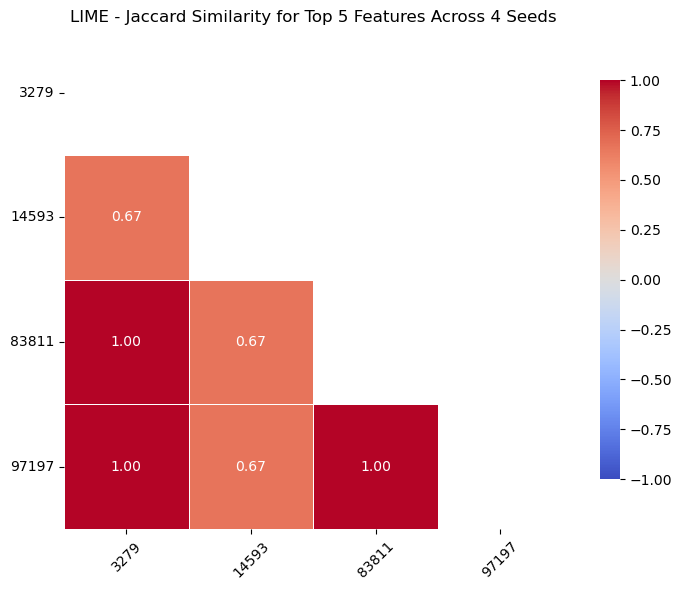

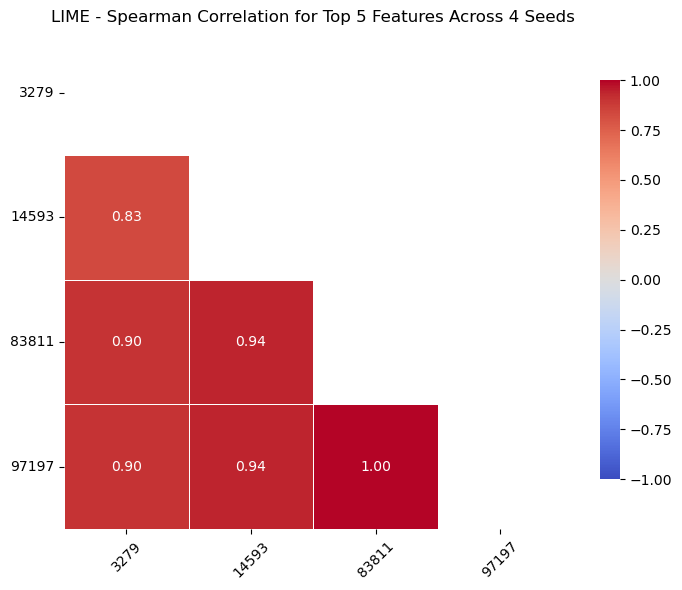

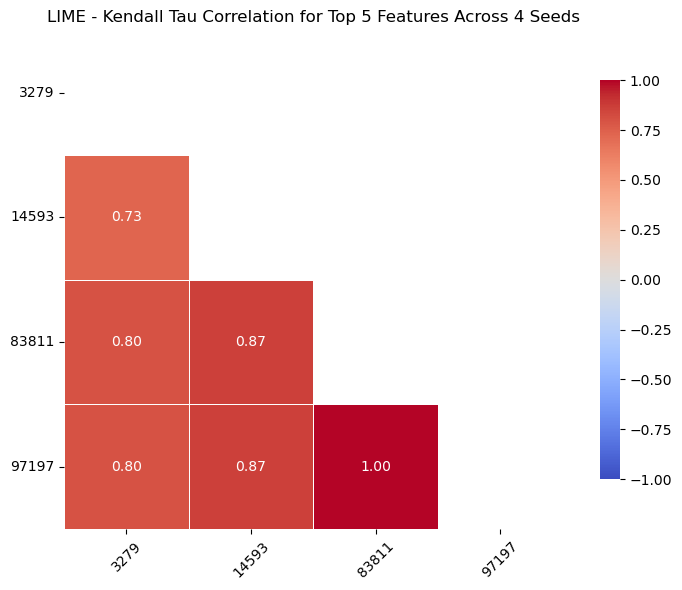

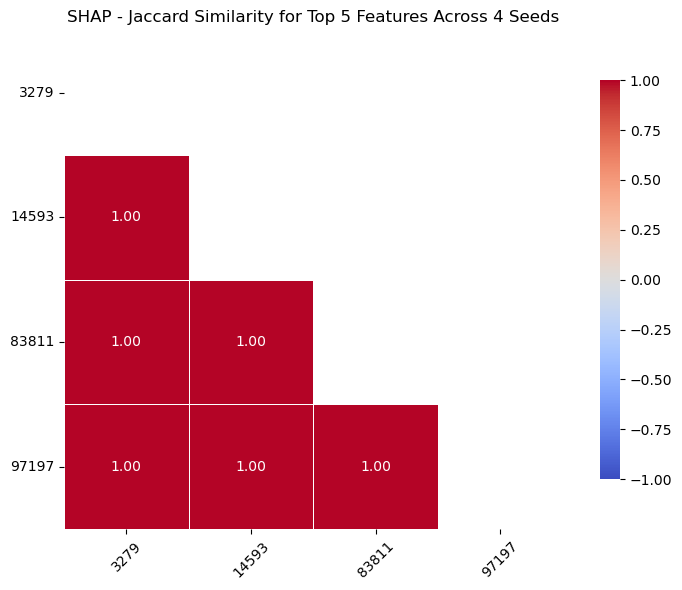

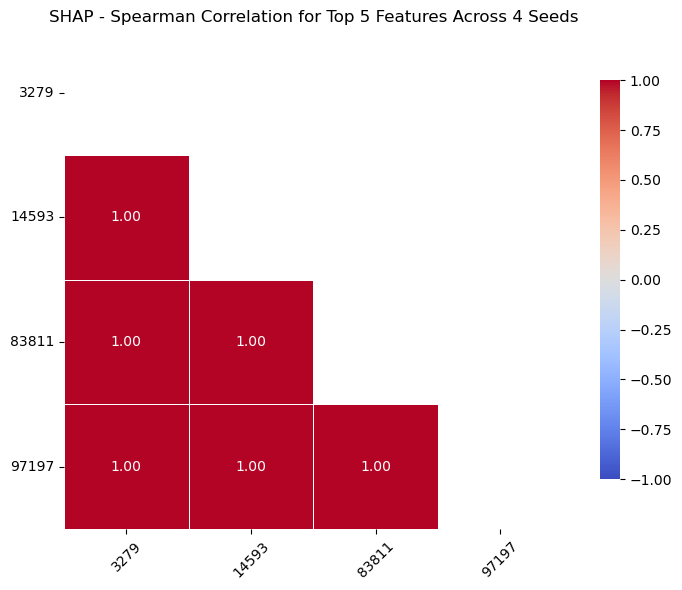

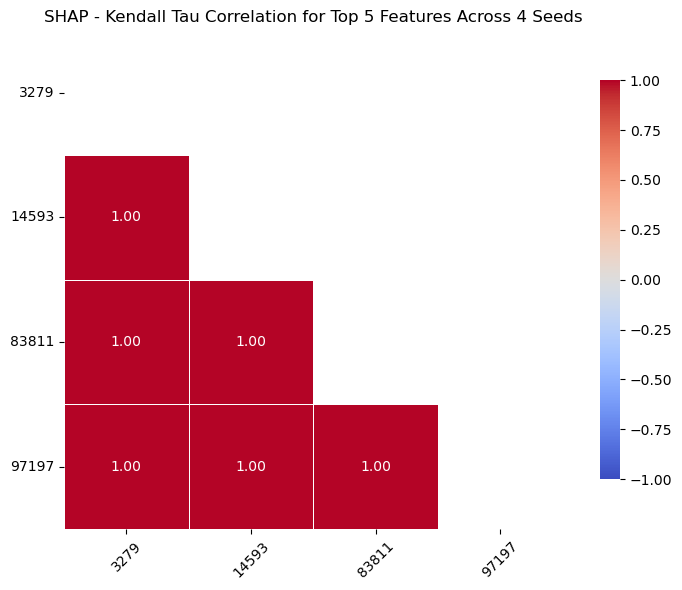

In [33]:
plot_lower_triangle(matrices['lime_jaccard'], "LIME - Jaccard Similarity")
plot_lower_triangle(matrices['lime_spearman'], "LIME - Spearman Correlation")
plot_lower_triangle(matrices['lime_kendall'], "LIME - Kendall Tau Correlation")

plot_lower_triangle(matrices['shap_jaccard'], "SHAP - Jaccard Similarity")
plot_lower_triangle(matrices['shap_spearman'], "SHAP - Spearman Correlation")
plot_lower_triangle(matrices['shap_kendall'], "SHAP - Kendall Tau Correlation")


### Aggregation Table

In [98]:
table_df = pd.DataFrame(results)


In [99]:
table_df.head(5)

,id,seed1,seed2,comparison_type,jaccard_similarity,spearman_correlation,kendall_tau
0,7,3279,14593,lime_top5_names,0.666667,0.828571,0.733333
1,7,3279,83811,lime_top5_names,1.000000,0.900000,0.800000
2,7,3279,97197,lime_top5_names,1.000000,0.900000,0.800000
3,7,14593,83811,lime_top5_names,0.666667,0.942857,0.866667
4,7,14593,97197,lime_top5_names,0.666667,0.942857,0.866667


In [100]:
metrics = ['jaccard_similarity', 'spearman_correlation', 'kendall_tau']

# define the aggregation functions
agg_funcs = ['mean', 'std', 'min', 'max']

# perform the grouped aggregation
summary = (
    table_df
    .groupby('comparison_type')[metrics]
    .agg(agg_funcs)
)

# flatten the MultiIndex columns
summary.columns = ['_'.join(col) for col in summary.columns]

# (optional) reset index if you want 'comparison_type' back as a column
summary = summary.reset_index()

summary

,comparison_type,jaccard_similarity_mean,jaccard_similarity_std,jaccard_similarity_min,jaccard_similarity_max,spearman_correlation_mean,spearman_correlation_std,spearman_correlation_min,spearman_correlation_max,kendall_tau_mean,kendall_tau_std,kendall_tau_min,kendall_tau_max
0,lime_top5_names,0.834925,0.193046,0.25,1.0,0.850664,2.058764e-01,-0.6,1.0,0.776246,2.350756e-01,-0.48,1.0
1,shap_top5_names,1.000000,0.000000,1.00,1.0,1.000000,3.254138e-17,1.0,1.0,1.000000,3.254138e-17,1.00,1.0


In [81]:
styled_summary = summary.style \
    .background_gradient(cmap='Blues') \
    .format(precision=3) \
    .set_caption("Metric Summary by Comparison Type") \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
styled_summary


,comparison_type,jaccard_similarity_mean,jaccard_similarity_std,jaccard_similarity_min,jaccard_similarity_max,spearman_correlation_mean,spearman_correlation_std,spearman_correlation_min,spearman_correlation_max,kendall_tau_mean,kendall_tau_std,kendall_tau_min,kendall_tau_max
0,lime_top5_names,0.835,0.193,0.250,1.000,0.851,0.206,-0.600,1.000,0.776,0.235,-0.480,1.000
1,shap_top5_names,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000


### Single Cases

Worst case for TN,FN, 

Same samples of SHAP with both versions of shap visuals

In [106]:
evaluations_df = full_df[['id','evaluation']]

In [105]:
table_df

Index(['id', 'seed1', 'seed2', 'comparison_type', 'jaccard_similarity',
       'spearman_correlation', 'kendall_tau'],
      dtype='object')

In [109]:
scores_df = evaluations_df.merge(table_df, on='id', how='inner')


In [108]:
d = dtale.show(merged_df)
d.open_browser()

In [110]:
d.kill()

2025-05-16 18:36:53,951 - INFO     - Executing shutdown...
2025-05-16 18:36:53,952 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [112]:
# Filter for lime_top5_names
lime_df = scores_df[scores_df['comparison_type'] == 'lime_top5_names']

# Sort by the three similarity metrics in ascending order
sorted_df = lime_df.sort_values(by=['jaccard_similarity', 'spearman_correlation', 'kendall_tau'])

# Get the first occurrence of each evaluation type
worst_results_df = sorted_df.drop_duplicates(subset=['evaluation'])

# Display the result
worst_results_df

,id,evaluation,seed1,seed2,comparison_type,jaccard_similarity,spearman_correlation,kendall_tau
2921,53812,TN,83811,97197,lime_top5_names,0.250000,-0.600000,-0.48
6989,15185,FN,83811,97197,lime_top5_names,0.250000,0.025000,0.00
4081,38012,FP,3279,83811,lime_top5_names,0.250000,0.250000,0.08
384,18694,TP,3279,14593,lime_top5_names,0.428571,0.436364,0.35


In [115]:
text_df = full_df[['id','text']]
worst_id = worst_results_df[['id','evaluation']]

single_samples = pd.merge(worst_id,text_df,on='id',how='inner').drop_duplicates()

In [116]:
single_samples

,id,evaluation,text
0,53812,TN,In my opinion fury is bi polar.understanding t...
4,15185,FN,they are calling nick fuentes not part of the ...
8,38012,FP,FAGGOT'S LIFE - Total submission is the greate...
12,18694,TP,you cannot be reasonable with 3 rd world retar...


In [119]:
single_samples['id'].to_list()

[53812, 15185, 38012, 18694]